In [29]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [31]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [32]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [33]:
timeseries_data = np.load('/content/drive/MyDrive/training_dataset/training_data.npy')
print(timeseries_data.shape)

categories_data = np.load('/content/drive/MyDrive/training_dataset/categories.npy')
print(categories_data.shape)

valid_periods = np.load('/content/drive/MyDrive/training_dataset/valid_periods.npy')
print(valid_periods.shape)

(48000, 2776)
(48000,)
(48000, 2)


In [34]:
timeseries_data_df = pd.DataFrame(timeseries_data)
timeseries_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1016.6 MB


In [35]:
min, max = (9999, -1), (0, -1)
lengths = []
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    lengths.append(diff)
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)

min, max

((24, 47852), (2776, 17143))

In [36]:
sample_first = timeseries_data_df.T[0]
sample_shortest = timeseries_data_df.T[min[1]]
sample_longest = timeseries_data_df.T[max[1]]

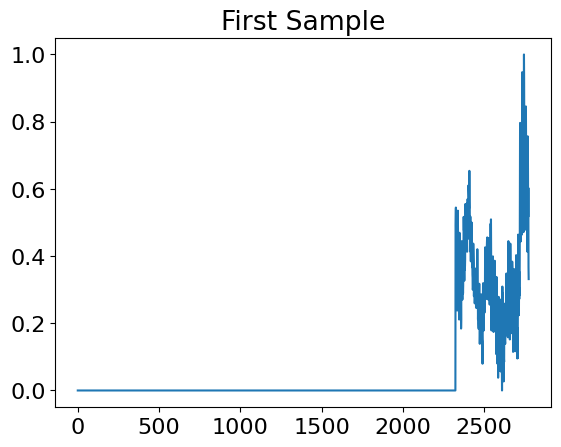

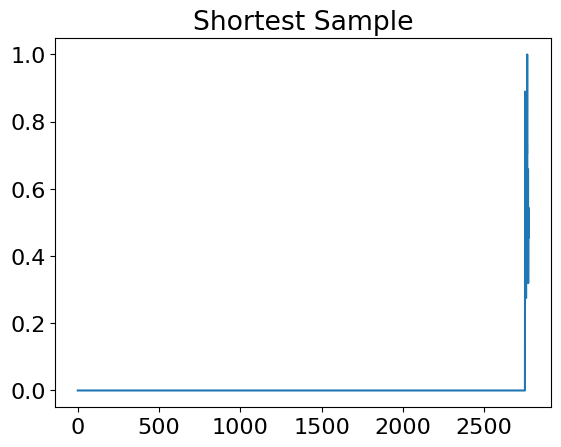

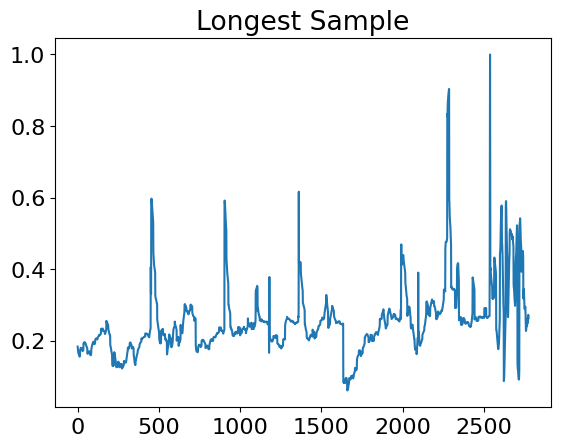

In [37]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.700e+01, 1.230e+02, 8.000e+01, 4.900e+01, 4.100e+01, 4.400e+01,
        5.200e+02, 1.104e+03, 4.870e+02, 6.703e+03, 6.590e+02, 4.900e+01,
        2.800e+01, 6.900e+01, 2.720e+02, 2.870e+02, 7.100e+01, 1.270e+02,
        3.120e+02, 3.400e+02, 8.300e+01, 5.300e+01, 9.650e+02, 1.880e+02,
        1.900e+01, 3.900e+01, 3.000e+01, 2.100e+01, 1.400e+01, 4.700e+01,
        6.900e+01, 3.450e+02, 7.000e+00, 1.200e+01, 1.100e+01, 2.300e+01,
        9.000e+00, 8.000e+00, 3.200e+0

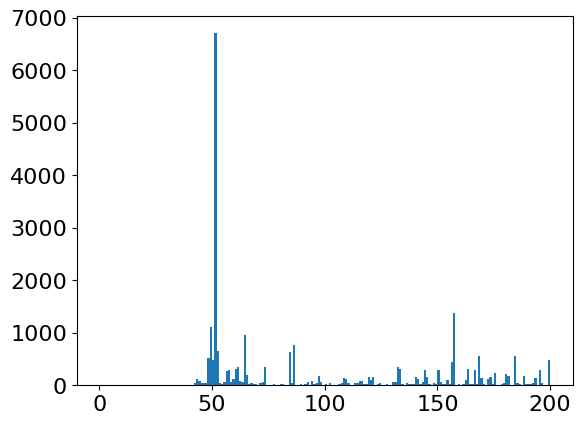

In [38]:
plt.hist(lengths, bins=200, range=(0,200))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 2.410e+02, 1.758e+03, 7.926e+03, 8.260e+02,
        1.753e+03, 2.970e+02, 4.820e+02, 6.300e+01, 6.910e+02, 8.450e+02,
        1.810e+02, 3.140e+02, 8.000e+01, 3.350e+02, 1.450e+02, 3.620e+02,
        3.260e+02, 6.700e+01, 8.080e+02, 1.130e+02, 6.430e+02, 2.530e+02,
        5.010e+02, 1.881e+03, 4.560e+02, 1.032e+03, 3.310e+02, 3.110e+02,
        9.800e+02, 2.880e+02, 2.310e+02, 4.050e+02, 6.310e+02, 4.900e+02,
        3.210e+02, 1.966e+03, 7.100e+02, 5.010e+02, 5.500e+01, 2.950e+02,
        2.360e+02, 1.220e+02, 6.790e+02, 6.000e+01, 8.430e+02, 2.800e+02,
        6.570e+02, 5.030e+02, 8.300e+01, 6.654e+03, 1.250e+02, 1.056e+03,
        1.830e+02, 4.500e+01, 5.620e+02, 4.420e+02, 1.160e+02, 6.700e+01,
        5.630e+02, 2.350e+02, 1.500e+02, 2.950e+02, 3.400e+01, 2.300e+01,
        5.000e+01, 1.250e+02, 7.300e+01, 2.500e+01, 2.060e+02, 4.300e+01,
        2.300e+01, 9.400e+01, 3.800e+0

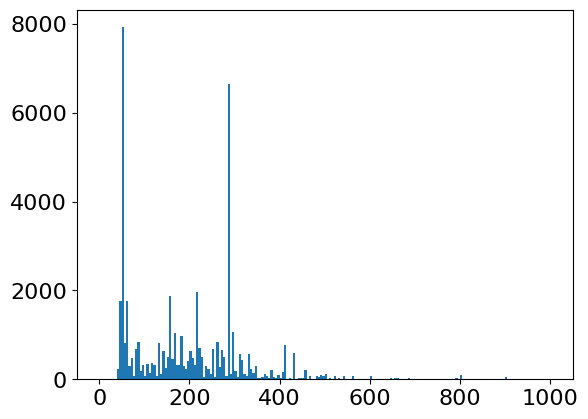

In [39]:
plt.hist(lengths, bins=200, range=(0,1000))

### Function to create sub-arrays of size 218 from valid periods

In [40]:
# Function to create sub-arrays of size 218 from valid periods with sliding
def create_sub_arrays(data, valid_periods, onehot_categories, window_size=218, slide=10):
    sub_arrays = []
    cat_values = []
    for i in range(len(data)):
        start, end = valid_periods[i]
        valid_data = data[i, start:end]
        length = len(valid_data)

        if length < window_size:
            # Padding with mean
            #mean_value = np.mean(valid_data)
            padding = np.full((window_size - length,), 0)
            padded_data = np.concatenate([valid_data, padding])
            sub_arrays.append(padded_data)
            cat_values.append(onehot_categories[i])
        else:
            for j in range(start, end - window_size + 1, slide):
                sub_arrays.append(data[i, j:j + window_size])
                cat_values.append(onehot_categories[i])

    return np.array(sub_arrays), np.array(cat_values)

In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories_data.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Create sub arrays

In [42]:
sub_arrays, cat_data = create_sub_arrays(timeseries_data, valid_periods, onehot_categories)


### Splitting the data into features and targets

In [43]:

X = sub_arrays[:, :200]  # First 200 values as features
y = sub_arrays[:, 200:]  # Next 18 values as targets

In [44]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test, cat_train, cat_test = train_test_split(X, y, cat_data, test_size=0.2, random_state=42)


# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### LSTM Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(200, 1)))
model.add(Dense(18))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Conv1D, Dense, Concatenate, RepeatVector, Cropping1D
from tensorflow.keras.models import Model

def build_CONV_LSTM_model(input_shape, category_shape, output_shape):
    # Ensure the input time steps are at least as many as the output time steps
    assert input_shape[0] >= output_shape[0], "Input time steps should be >= output time steps"

    # Time Series Input
    input_layer = Input(shape=input_shape, name='input_layer')
    x = Bidirectional(LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm')(input_layer)
    x = Conv1D(128, 3, padding='same', activation='relu', name='conv')(x)

    # Category Input
    category_input = Input(shape=category_shape, name='category_input')
    category_processed = Dense(20, activation='relu')(category_input)
    category_processed = RepeatVector(input_shape[0])(category_processed)

    # Combine the processed inputs
    combined = Concatenate()([x, category_processed])

    # Output Convolution Layer
    output_layer = Conv1D(output_shape[1], 3, padding='same', name='output_layer')(combined)

    # Adjust output size if necessary
    if output_layer.shape[1] > output_shape[0]:
        crop_size = output_layer.shape[1] - output_shape[0]
        output_layer = Cropping1D((0, crop_size))(output_layer)

    # Construct the model
    model = Model(inputs=[input_layer, category_input], outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

model = build_CONV_LSTM_model((200, 1), (6,), (18, 1))


In [47]:
model = build_CONV_LSTM_model((200, 1),(6,), (18, 1))

In [48]:
X_train.shape

(204264, 200, 1)

### Train Model

In [49]:
batch_size=16
epochs = 50


In [50]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=15,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    patience=10,
    factor=0.1,
    min_lr=1e-5
)

history = model.fit(
    x = [X_train, cat_train],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_test, cat_test], y_test),
    callbacks = [
        early_stopping,
        reduce_lr
    ]
).history

Epoch 1/50
12767/12767 [==============================] - 226s 17ms/step - loss: 0.0578 - val_loss: 0.0725 - lr: 0.0010
Epoch 2/50
12767/12767 [==============================] - 232s 18ms/step - loss: 0.0194 - val_loss: 0.0132 - lr: 0.0010
Epoch 3/50
12767/12767 [==============================] - 223s 17ms/step - loss: 0.0129 - val_loss: 0.0126 - lr: 0.0010
Epoch 4/50
12767/12767 [==============================] - 217s 17ms/step - loss: 0.0125 - val_loss: 0.0121 - lr: 0.0010
Epoch 5/50
12767/12767 [==============================] - 221s 17ms/step - loss: 0.0121 - val_loss: 0.0122 - lr: 0.0010
Epoch 6/50
12767/12767 [==============================] - 217s 17ms/step - loss: 0.0118 - val_loss: 0.0114 - lr: 0.0010
Epoch 7/50
12767/12767 [==============================] - 215s 17ms/step - loss: 0.0114 - val_loss: 0.0112 - lr: 0.0010
Epoch 8/50
12767/12767 [==============================] - 212s 17ms/step - loss: 0.0112 - val_loss: 0.0110 - lr: 0.0010
Epoch 9/50
12767/12767 [================

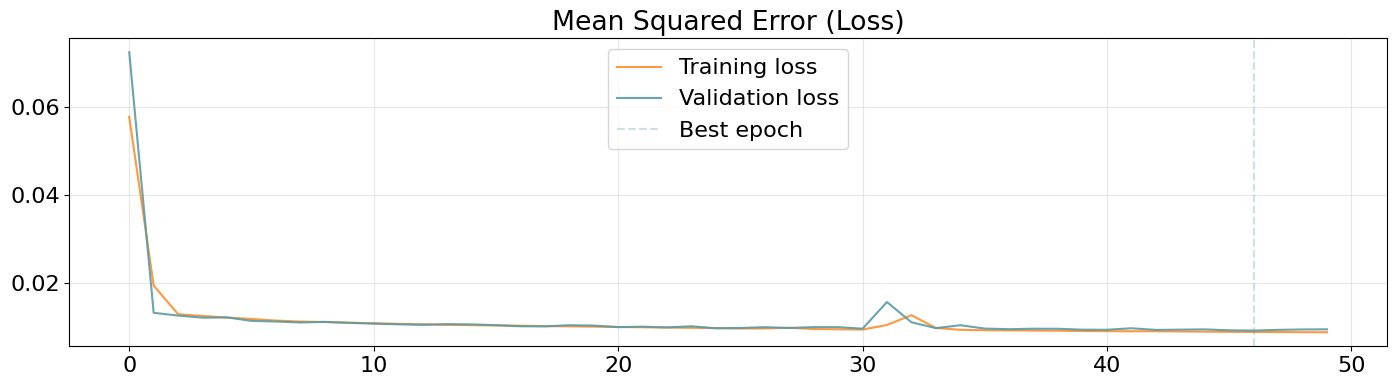

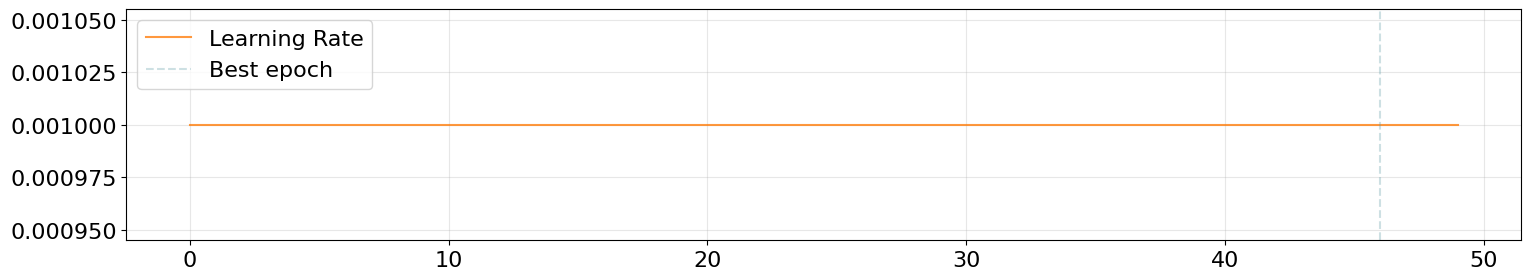

In [51]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [52]:
preds = model.predict([X_test, cat_test])

1596/1596 [==============================] - 12s 7ms/step


In [53]:
# Print the shape of the predictions
print(f"Predictions shape: {preds.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test.flatten(), preds.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test.flatten(), preds.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (51066, 18, 1)
Mean Squared Error: 0.009450387209653854
Mean Absolute Error: 0.060052305459976196


In [54]:
def plot_with_training(y_train, y_true, y_pred, num_samples=3):
    """Plot the training, true, and predicted values for a random sample of sequences."""
    sample_indices = np.random.choice(np.arange(len(y_true)), num_samples, replace=False)

    for i, index in enumerate(sample_indices, 1):
        plt.figure(figsize=(12, 4))

        # Plot the training part (first 200 points)
        plt.plot(y_train[index].flatten(), label='Training Values', color='blue')

        # Plot the true values (next 18 points)
        true_start_index = len(y_train[index])
        plt.plot(range(true_start_index, true_start_index + len(y_true[index])),
                 y_true[index].flatten(), label='True Values', color='green')

        # Plot the predicted values (next 18 points)
        plt.plot(range(true_start_index, true_start_index + len(y_pred[index])),
                 y_pred[index].flatten(), label='Predicted Values', linestyle='--', color='red')

        plt.title(f'Sequence {i} - Training, True vs Predicted')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


In [55]:
y_test.shape

(51066, 18)

In [56]:
preds.shape

(51066, 18, 1)

In [57]:
X_test.shape

(51066, 200, 1)

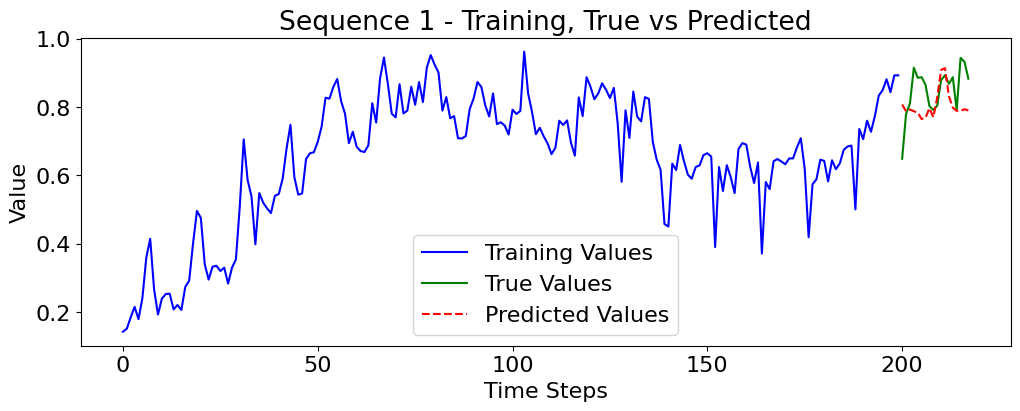

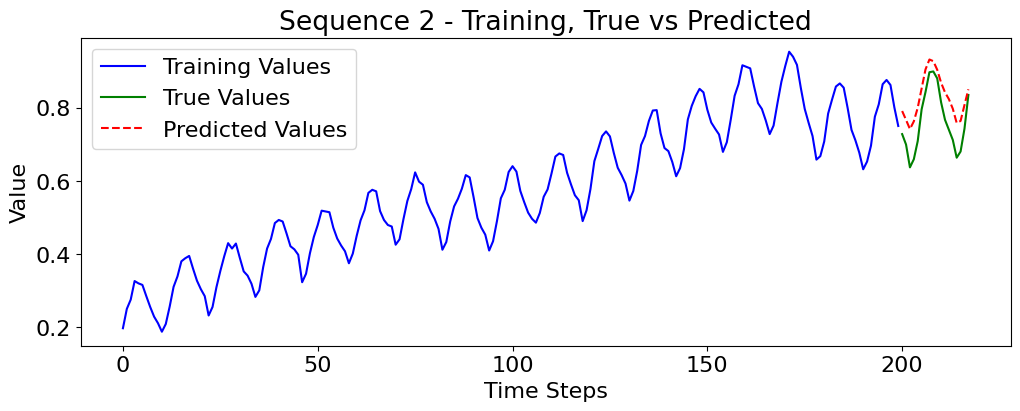

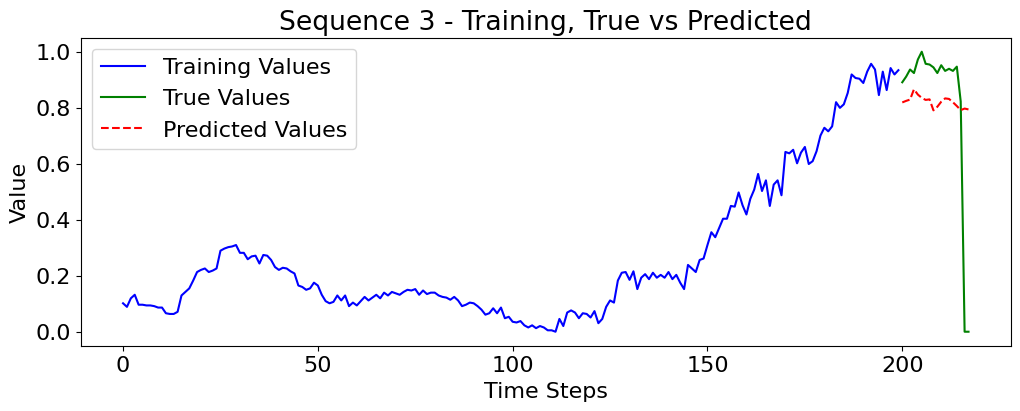

In [58]:
plot_with_training(X_test, y_test, preds)

In [59]:
model.save('conv_lstm_padding_tecniques_analysis_2_zero_padding')